# **Modules Import & Intiation**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score , root_mean_squared_error , accuracy_score , confusion_matrix , mean_absolute_error , precision_score , recall_score , f1_score , classification_report

# **OSEM Framework will Help us deal with our task**
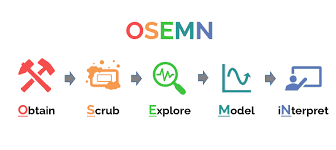

## **Obtain the Data Set**

In [2]:
creditCard = pd.read_csv('/content/drive/MyDrive/CSAI 253 Data Sets/creditcard.csv')

In [3]:
creditCard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
creditCard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
creditCard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
creditCard.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
36512,38570.0,-0.598635,1.268409,0.224620,-0.416959,0.592685,0.264004,0.183942,0.631090,-0.654747,...,-0.288066,-0.932221,-0.185951,-1.459886,0.052533,0.165177,0.112799,0.006817,1.98,0
16648,28013.0,-0.954537,0.099213,1.082653,-1.136061,1.059006,-1.409175,1.033244,-0.421959,-0.631869,...,-0.226195,-0.683273,0.188697,0.371565,-0.547842,0.455546,-0.321338,-0.001521,25.95,0
111853,72397.0,-0.933029,1.285059,1.453680,-0.199466,-0.231296,-0.756353,0.523027,0.124745,-0.194609,...,-0.230787,-0.538614,0.015814,0.492605,-0.169507,0.052333,0.468380,0.238671,1.29,0
137224,82071.0,0.006779,-2.747938,-0.714742,0.140833,-1.618563,-0.803328,0.736954,-0.483378,-0.882801,...,-0.010631,-1.069304,-0.642739,0.482113,0.167559,1.014292,-0.205673,0.124131,730.96,0
144523,86188.0,1.101750,-0.185043,1.225790,1.308507,-0.914309,0.240533,-0.721612,0.302889,1.084861,...,-0.047584,0.032370,0.037784,0.049055,0.296694,-0.375565,0.079748,0.032759,12.99,0
151510,95620.0,1.887798,-0.082840,-1.607472,0.533244,0.239369,-0.661825,-0.040679,-0.171867,2.119843,...,-0.331255,-0.609490,0.107373,-0.578652,-0.120956,-0.125982,-0.047196,-0.032775,65.27,0
263533,160998.0,-1.082085,1.311116,-0.849925,-1.595741,1.704410,-0.560482,2.014702,-0.866621,0.216656,...,0.138420,0.719796,-0.404333,0.230798,0.188954,0.036151,-0.722970,-0.112357,26.56,0
182657,125497.0,-1.585418,-0.699978,0.466537,-3.050962,-0.377370,-0.433762,0.771583,-0.505619,-2.274425,...,-0.096472,0.554004,-0.108564,0.607123,1.100317,0.085058,-0.275533,-0.018025,141.50,0
39714,39934.0,-0.782439,0.978493,1.773904,0.306059,0.302794,-0.386761,0.694508,-0.106470,-0.260497,...,-0.302526,-0.686905,-0.150782,0.005785,-0.051248,0.238701,0.000582,-0.082224,11.99,0
266787,162484.0,1.823170,-0.556681,-1.750805,0.260344,1.968758,3.963545,-0.900886,1.031004,0.689279,...,-0.181274,-0.658320,0.374245,0.624798,-0.369203,-0.966551,0.061359,-0.020964,66.99,0


##**Scrubbing the Data Set from**


1.   Missing Records
2.   Duplicates
3. Outliers



**Missing Values Handler**

In [7]:
creditCard.isnull().sum()
# We can conclude now that there is not any missing values in any column

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


**Duplicate Records Handler**

In [8]:
print(f"{creditCard.duplicated().sum() / creditCard.shape[0] * 100 :.2f}  % of the data is duplicated The Decision will be Drop out those duplicated records")
creditCard.drop_duplicates(inplace=True)

0.38  % of the data is duplicated The Decision will be Drop out those duplicated records


In [9]:
creditCard[creditCard.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


**Outliers Handler**

*We can now create conclusion that the Z score for the column that will exceed 3 have outliers*

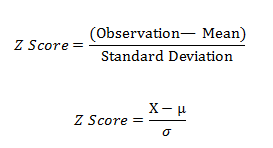

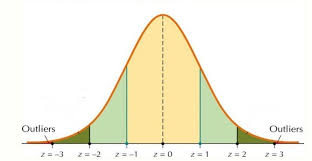

In [14]:
standered_Z_Score_Fetcher ={}
for column in creditCard.columns:
  standered_Z_Score_Fetcher[column] = (creditCard[column] - creditCard[column].mean()) / creditCard[column].std()

{'Time': Series([], Name: Time, dtype: float64),
 'V1': 164      -3.130946
 290      -3.007343
 1158     -3.170174
 1632     -5.722009
 2178     -3.005680
             ...   
 284561   -3.335137
 284649   -6.135900
 284772   -3.449514
 284795   -6.428378
 284802   -6.102092
 Name: V1, Length: 3647, dtype: float64,
 'V2': 18       -3.307222
 164      -7.354136
 210      -3.599667
 249      -3.083179
 290       3.201252
             ...   
 284517    3.863573
 284561    3.464342
 284649    5.937194
 284795    6.189309
 284802    6.118845
 Name: V2, Length: 4303, dtype: float64,
 'V3': 164      -3.775870
 1632     -8.213234
 5966     -3.181262
 5980     -3.488703
 6331     -4.137592
             ...   
 284610   -3.406974
 284631   -3.399712
 284649   -5.307845
 284795   -5.619663
 284802   -6.519861
 Name: V3, Length: 1953, dtype: float64,
 'V4': 83       -3.191139
 351      -3.133429
 608      -3.291353
 858       3.439507
 1632      4.254264
             ...   
 284652    3.486058
 284

In [12]:
standered_Z_Score_Fetcher

{'Time': 0        -1.996819
 1        -1.996819
 2        -1.996798
 3        -1.996798
 4        -1.996777
             ...   
 284802    1.642233
 284803    1.642254
 284804    1.642275
 284805    1.642275
 284806    1.642359
 Name: Time, Length: 283726, dtype: float64,
 'V1': 0        -0.701081
 1         0.608791
 2        -0.700335
 3        -0.499064
 4        -0.597605
             ...   
 284802   -6.102092
 284803   -0.379207
 284804    0.982352
 284805   -0.126465
 284806   -0.276860
 Name: V1, Length: 283726, dtype: float64,
 'V2': 0        -0.041687
 1         0.164137
 2        -0.811335
 3        -0.109972
 4         0.535538
             ...   
 284802    6.118845
 284803   -0.030938
 284804   -0.180433
 284805    0.324659
 284806   -0.112709
 Name: V2, Length: 283726, dtype: float64,
 'V3': 0         1.680098
 1         0.109279
 2         1.174268
 3         1.187381
 4         1.025468
             ...   
 284802   -6.519861
 284803    1.347810
 284804   -2.155029
 28

## **Exploring the Data Set Using Visualization Modules**

## **Using the data for classfication problem**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**KNN Classfier**

In [ ]:
listOfKs = []
listOfAccuracy = []
for k in range(1,50):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  listOfKs.append(k)